In [1]:
import pandas as pd
customer = pd.read_csv("../Datasets/customer_join.csv")
uselog_months = pd.read_csv("../Datasets/use_log_months.csv")

In [2]:
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


In [3]:
uselog_months.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [4]:
year_months = list(uselog_months["年月"].unique())
uselog = pd.DataFrame()
for i in range(1, len(year_months)):
    tmp = uselog_months.loc[uselog_months["年月"] == year_months[i]].copy()
    tmp.rename(columns={"count":"count_0"}, inplace=True)
    tmp_before = uselog_months.loc[uselog_months["年月"]==year_months[i-1]].copy()
    del tmp_before["年月"]
    tmp_before.rename(columns={"count":"count_1"}, inplace=True)
    tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")
    uselog = pd.concat([uselog,tmp], ignore_index=True)
uselog.head()

,年月,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0


In [5]:
from dateutil.relativedelta import relativedelta
exit_customer = customer.loc[customer["is_deleted"]==1].copy()
exit_customer["exit_date"] = None
exit_customer["end_date"] = pd.to_datetime(exit_customer["end_date"])
for i in exit_customer.index:
    exit_customer.loc[i,"exit_date"] = exit_customer.loc[i,"end_date"] - relativedelta(months=1)
exit_customer["exit_date"] = pd.to_datetime(exit_customer["exit_date"])
exit_customer["年月"] = exit_customer["exit_date"].dt.strftime("%Y%m")
uselog["年月"] = uselog["年月"].astype(str)
exit_uselog = pd.merge(uselog, exit_customer, on=["customer_id", "年月"],how="left")
print(len(uselog))
exit_uselog.head()

33851


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [6]:
exit_uselog = exit_uselog.dropna(subset=["name"])
print(len(exit_uselog))
print(len(exit_uselog["customer_id"].unique()))
exit_uselog.head()

1104
1104


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,10500.0,通常,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,10500.0,通常,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,6000.0,通常,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30


In [7]:
conti_customer = customer.loc[customer["is_deleted"] == 0]
conti_uselog = pd.merge(uselog, conti_customer, on=["customer_id"], how="left")
print(len(conti_uselog))
conti_uselog = conti_uselog.dropna(subset=["name"])
print(len(conti_uselog))

33851
27422


In [8]:
conti_uselog = conti_uselog.sample(frac=1, random_state=0).reset_index(drop=True)
conti_uselog = conti_uselog.drop_duplicates(subset="customer_id")
print(len(conti_uselog))
conti_uselog.head()

2842


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaN,CA2,...,オールタイム,10500.0,入会費半額,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaN,CA1,...,オールタイム,10500.0,通常,7.166667,7.0,10.0,5.0,1.0,2019-04-30,13.0
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaN,CA1,...,オールタイム,10500.0,通常,6.083333,6.0,8.0,2.0,1.0,2019-04-30,23.0
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaN,CA1,...,ナイト,6000.0,通常,6.916667,7.0,10.0,5.0,1.0,2019-04-30,14.0
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaN,CA1,...,オールタイム,10500.0,通常,6.333333,6.5,9.0,3.0,1.0,2019-04-30,19.0


In [9]:
predict_data = pd.concat([conti_uselog, exit_uselog], ignore_index=True)
print(len(predict_data))
predict_data.head()

3946


C:\Users\sho_taso\AppData\Local\Temp\ipykernel_16104\2208580704.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predict_data = pd.concat([conti_uselog, exit_uselog], ignore_index=True)


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaT,CA2,...,10500.0,入会費半額,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0,NaT
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaT,CA1,...,10500.0,通常,7.166667,7.0,10.0,5.0,1.0,2019-04-30,13.0,NaT
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaT,CA1,...,10500.0,通常,6.083333,6.0,8.0,2.0,1.0,2019-04-30,23.0,NaT
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaT,CA1,...,6000.0,通常,6.916667,7.0,10.0,5.0,1.0,2019-04-30,14.0,NaT
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaT,CA1,...,10500.0,通常,6.333333,6.5,9.0,3.0,1.0,2019-04-30,19.0,NaT


In [10]:
predict_data["period"] = 0
predict_data["now_date"] = pd.to_datetime(predict_data["年月"], format="%Y%M")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"], format="mixed")
for i in range(len(predict_data)):
    delta = relativedelta(predict_data.loc[i, "now_date"], predict_data.loc[i , "start_date"])
    predict_data.loc[i, "period"] = int(delta.years*12 + delta.months)
predict_data.head()

,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,period,now_date
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaT,CA2,...,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0,NaT,-4,2018-01-01 00:06:00
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaT,CA1,...,7.166667,7.0,10.0,5.0,1.0,2019-04-30,13.0,NaT,-1,2018-01-01 00:12:00
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaT,CA1,...,6.083333,6.0,8.0,2.0,1.0,2019-04-30,23.0,NaT,8,2018-01-01 00:08:00
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaT,CA1,...,6.916667,7.0,10.0,5.0,1.0,2019-04-30,14.0,NaT,0,2018-01-01 00:05:00
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaT,CA1,...,6.333333,6.5,9.0,3.0,1.0,2019-04-30,19.0,NaT,4,2018-01-01 00:05:00


In [11]:
predict_data.isna().sum()

年月                      0
customer_id             0
count_0                 0
count_1               255
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2842
period                  0
now_date                0
dtype: int64

In [12]:
predict_data = predict_data.dropna(subset=["count_1"])
predict_data.isna().sum()

年月                      0
customer_id             0
count_0                 0
count_1                 0
name                    0
class                   0
gender                  0
start_date              0
end_date             2639
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2639
period                  0
now_date                0
dtype: int64

In [13]:
target_col = ["campaign_name", "class_name", "gender", "count_1", "routine_flg", "period", "is_deleted"]
predict_data = predict_data[target_col]
predict_data.head()

,campaign_name,class_name,gender,count_1,routine_flg,period,is_deleted
0,入会費半額,オールタイム,M,7.0,1.0,-4,0.0
1,通常,オールタイム,M,5.0,1.0,-1,0.0
2,通常,オールタイム,M,4.0,1.0,8,0.0
3,通常,ナイト,M,6.0,1.0,0,0.0
4,通常,オールタイム,M,7.0,1.0,4,0.0


In [14]:
predict_data = pd.get_dummies(predict_data)
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,campaign_name_通常,class_name_オールタイム,class_name_デイタイム,class_name_ナイト,gender_F,gender_M
0,7.0,1.0,-4,0.0,True,False,False,True,False,False,False,True
1,5.0,1.0,-1,0.0,False,False,True,True,False,False,False,True
2,4.0,1.0,8,0.0,False,False,True,True,False,False,False,True
3,6.0,1.0,0,0.0,False,False,True,False,False,True,False,True
4,7.0,1.0,4,0.0,False,False,True,True,False,False,False,True


In [15]:
del predict_data["campaign_name_通常"]
del predict_data["class_name_ナイト"]
del predict_data["gender_M"]
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,class_name_オールタイム,class_name_デイタイム,gender_F
0,7.0,1.0,-4,0.0,True,False,True,False,False
1,5.0,1.0,-1,0.0,False,False,True,False,False
2,4.0,1.0,8,0.0,False,False,True,False,False
3,6.0,1.0,0,0.0,False,False,False,False,False
4,7.0,1.0,4,0.0,False,False,True,False,False


In [16]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection

exit = predict_data.loc[predict_data["is_deleted"]==1]
conti = predict_data.loc[predict_data["is_deleted"]==0].sample(len(exit), random_state=0)

X= pd.concat([exit,conti], ignore_index=True)
y = X["is_deleted"]
del X["is_deleted"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,random_state=0)

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(y_test_pred)

[0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.

In [17]:
results_test = pd.DataFrame({"y_test":y_test, "y_pred":y_test_pred})
results_test.head()

,y_test,y_pred
1091,0.0,0.0
1786,0.0,0.0
1439,0.0,0.0
745,1.0,1.0
820,1.0,1.0


In [18]:
correct = len(results_test.loc[results_test["y_test"]==results_test["y_pred"]])
data_count = len(results_test)
score_test = correct / data_count
print(score_test)

0.8802281368821293


In [19]:
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.8802281368821293
0.9727503168567807


In [20]:
X = pd.concat([exit, conti], ignore_index=True)
y = X["is_deleted"]
del X["is_deleted"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,random_state=0)

model = DecisionTreeClassifier(random_state=0, max_depth=5)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.9106463878326996
0.9201520912547528


In [21]:
importance = pd.DataFrame({"feature_names": X.columns, "coefficient":model.feature_importances_})
importance

,feature_names,coefficient
0,count_1,0.268195
1,routine_flg,0.376239
2,period,0.351212
3,campaign_name_入会費半額,0.000000
4,campaign_name_入会費無料,0.000000
5,class_name_オールタイム,0.000000
6,class_name_デイタイム,0.000775
7,gender_F,0.003579


[Text(0.3108108108108108, 0.9166666666666666, 'routine_flg <= 0.5\ngini = 0.5\nsamples = 1578\nvalue = [792.0, 786.0]'),
 Text(0.05405405405405406, 0.75, 'count_1 <= 6.5\ngini = 0.006\nsamples = 353\nvalue = [1, 352]'),
 Text(0.18243243243243243, 0.8333333333333333, 'True  '),
 Text(0.02702702702702703, 0.5833333333333334, 'gini = 0.0\nsamples = 294\nvalue = [0, 294]'),
 Text(0.08108108108108109, 0.5833333333333334, 'count_1 <= 7.5\ngini = 0.033\nsamples = 59\nvalue = [1, 58]'),
 Text(0.05405405405405406, 0.4166666666666667, 'class_name_デイタイム <= 0.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.02702702702702703, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.08108108108108109, 0.25, 'period <= -0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05405405405405406, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10810810810810811, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.10810810810810811, 0.4166666666666

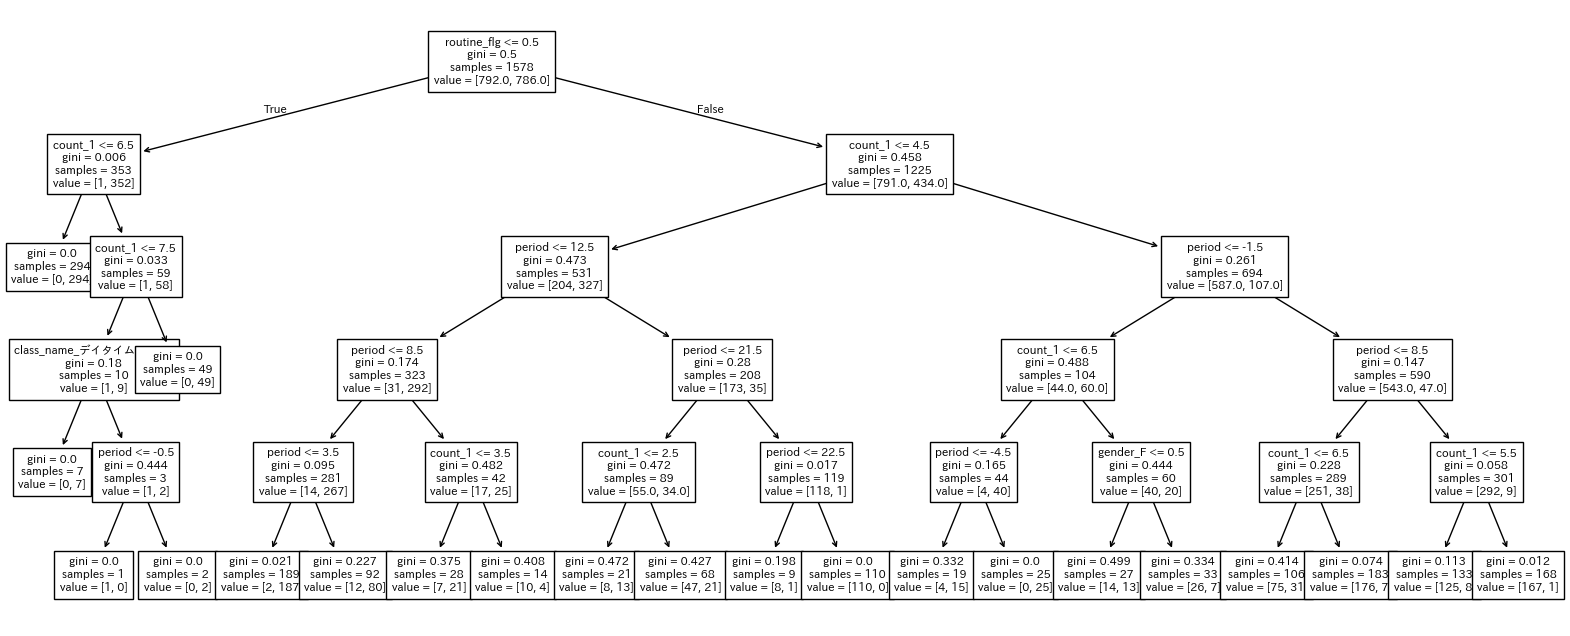

In [22]:
from sklearn import tree
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(20,8))
tree.plot_tree(model, feature_names=X.columns, fontsize=8)

In [23]:
count_1 = 3
routine_flg = 1
period = 10
campaign_name = "入会費無料"
class_name = "オールタイム"
gender = "M"

In [24]:
if campaign_name == "入会費半額":
    campaign_name_list = [1,0]
elif campaign_name == "入会費無料":
    campaign_name_list = [0,1]
elif campaign_name == "通常":
    campaign_name_list = [0,0]
if class_name == "オールタイム":
    class_name_list = [1,0]
elif class_name == "デイタイム":
    class_name_list = [0,1]
elif class_name == "ナイト":
    class_name_list = [0,0]
if gender == "F":
    gender_list = [1]
elif gender == "M":
    gender_list = [0]
input_data = [count_1, routine_flg, period]
input_data.extend(campaign_name_list)
input_data.extend(class_name_list)
input_data.extend(gender_list)
input_data = pd.DataFrame(data=[input_data], columns=X.columns)

In [25]:
print(model.predict(input_data))
print(model.predict_proba(input_data))

[1.]
[[0.25 0.75]]
